In [ ]:
# this is some code to get pretty highlighted cells for the questions - ignore this
from IPython.display import HTML
style1 = "<style>div.warn { background-color: #fcf2f2;border-color: #dFb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;}</style>"
HTML(style1)

This notebook covers some worked examples and some examples for you to try relating to **Block A, Chapter 4** in the notes.  This is practice and core material for coursework 1. The green questions are those most closely related to the assessed work for this module. *Once you have completed this notebook, you will be able to attempt QN 5 on coursework 1.*

## Core concepts:

**Spearman's rank**

Spearman's rank correlation coefficient can be defined as a special case of the Pearson $\rho$ applied to ranked (sorted) variables. Unlike Pearson, Spearman's correlation is not restricted to linear relationships. Instead, it measures monotonic association (only strictly increasing or decreasing, but not mixed) between two variables and relies on the rank order of values. In other words, rather than comparing means and variances, Spearman's coefficient looks at the relative order of values for each variable. This makes it appropriate to use with both continuous and discrete data.

Spearman's rank correlation is given by:

$\rho_s = \dfrac{\sum_{i = 1}^N  \,R(x_i)\,R(y_i) - N(N + 1)^2/4} {\sqrt{\sum_{i = 1}^N  \,R(x_i)^2 - N(N + 1)^2/4} \sqrt{\sum_{i = 1}^N  \,R(y_i)^2 - N(N + 1)^2/4}}$

In the case of no ties (i.e. duplicates of x, y, etc), the above expression reduces to 

$\rho_s = 1 - \dfrac{\sum_{i = 1}^N \, [R(x_i) -R(y_i)]^2 }{N\,(N^2 - 1) }
.$

One nice feature of the Spearman test is that it is not so sensitive to outliers at the extremes of $x$ and $y$ as the Pearson correlation co-efficient.  This is because the points are treated by their rank rather than their intrinsic value.

A nice easy way to rank the data in python is to use `from scipy.stats import rankdata` and `rank_x = rankdata(x)`.


## Non Parametric Tests

** Chi-squared Test**

In this type of hypothesis test, we try to determine whether the data fit a particular distribution or not. For example, we may suspect the unknown data fit a binomial distribution and use a chi-square test (meaning the distribution for the hypothesis test is chi-square) to determine if there is a fit or not. 

This chi square statistic is obtained by calculating the difference between the observed number of cases and the expected number of cases in each category. This difference is squared and divided by the expected number of cases in that category to give the (general) chi-squared statistic:

$ \chi^2 = \sum_i^N \left( \dfrac{O_i - E_i}{\sigma_i}  \right)^2.$

We can compare the chi-squared statistic to probability tables using the number of degrees of freedom.  In general, the number of degrees of freedom if you write your data as a table is (number of rows-1) times (number of columns-1)

** KS Test**

The Kolmogorov-Smirnov, or K-S test, is one of the most commonly used tests in data analysis. The K-S  is used to test whether two sets of data are drawn from the same underlying limiting distribution. It is based around the *cumulative distribution* of the data. 

The cumulative distribution $S_N(x)$ of a set of $N$ data points $\{ x_1, x2, \ldots, x_N \}$ is the fraction of data points with values less than a given $x$.  The function is created by simply sorting the data and making a running, normalised, sum for each value of $x$. Clearly the function moves in steps of $1/N$, being constant between consecutive values of $x$.

The K-S test then measures the *maximum distance* between two cumulative distributions. If one is comparing the data set to some limiting distribution $f(x)$, with corresponding cumulative function $F(x)$, then the distance $D$ between the two cumulative distributions is simply,

$D = \underset{-\infty < x < \infty}{\text{max}} |S_N(x) - F(x)|$

or in the case where one is comparing two data sets,

$D = \underset{-\infty < x < \infty}{\text{max}} |S_{N_1}(x) - S_{N_2}(x)|$

where $S_{N_1}(x)$  and  $S_{N_2}(x)$ are the two data sets. One nice feature of using the distance in this way is that the K-S invariant to expansions and contractions in $x$ -- it works just the same for $x$ and $\rm {log}(x)$.

** Anderson Darling**

This is an improvement on the problems of the K-S test in the tails of the distributions. The Anderson-Darling test weights the data points away from the median. The statistic is given by:


$A^2_{AD, N} = N \sum_{i = 1}^{N} \dfrac{ [i / N - S_N(x_i)]^2 }{S_N(x_i) (1 - S_N(x_i))  }$

which should be computed for *both* the observed data set and the null distribution. There is unfortunately no analytic form for the A-D test, and one instead needs to resort to numerical computation: one simply creates a suite of random draws of $N$  points from the null distribution to build up a pdf of $A^2_{AD, N}$. The observed value of $A^2_{AD, N}$ from the data set can then be compared to the probability of drawing the same value from the null, to decide wether to retain or reject the null hypothesis that the distributions are the same.

** Kendall's Tau**

Unlike Spearman's coefficient, Kendalls' $\tau$ test does not take into account the difference between ranks — only directional agreement. Therefore, this coefficient is more appropriate for discrete data. Kendall's $\tau$ coefficient is defined as:

${\tau ={\dfrac {({\text{number of concordant pairs}})-({\text{number of discordant pairs}})}{N(N-1)/2}}}$

A concordant pair eg (x1, y1), (x2, y2) are pairs of values in which ranks coincide: $x1 < x2$ and $y1 < y2$ or $x1 > x2$ and $y1 > y2$. A discordant pair would be one that does not satisfy this condition, eg ($x=1$,$y=7$) and ($x=2$,$y=5$) would be a discordant pair. 

Note that the null hypothesis for Kendall $\tau$ would be that the variables are uncorrelated.

***
## Worked example of KS Test:


**Question:**

We measure the current running through a circuit over a period of 8 hours. Each hour, we record the following currents (in amps)

1.41, 0.26, 1.97, 0.33, 0.55, 0.77, 1.46, 1.18

Is there any evidence that the current is drawn from a uniform distribution between 0 and 2 amps?

**Answer**

The probability density function of a uniform random variable $X$ between 0 and 2 is $f(x)=1/2$ for $0 < x < 2$. Therefore, the probability that $X$ is less than or equal to x is:

$P(X \le x)= \int^x_0 \dfrac{1}{2}dt=\dfrac{1}{2}x$

We are interested in testing:

the null hypothesis $H_0:$  

$F(x)=F_0(x)$ 

against the alternative hypothesis $H_1:

$F(x) \neq F_0(x).$

Let's compare the cumulative distributions for the current data and a randomly generated uniform distribution from $0 < x < 2$.


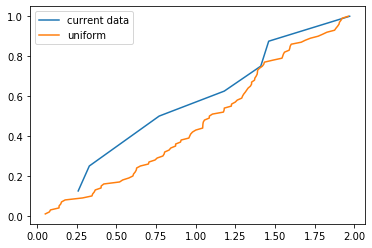

In [1]:
import numpy as np
import pylab as plt

%matplotlib inline

#make a function to plot the cdf for the sample
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

# generate random uniform distribution
s = np.random.uniform(0,2,100)

# you could also use the following that automatically calculates the function
# from statsmodels.distributions.empirical_distribution import ECDF

current = [1.41, 0.26, 1.97, 0.33, 0.55, 0.77, 1.46, 1.18]

xs, ys = ecdf(current)
xss, yss = ecdf(s)
plt.plot(xs, ys, label="current data", markerfacecolor='none')
plt.plot(xss, yss, label="uniform", markerfacecolor='none')
plt.legend(loc='upper left')

We can also use scipy.stats inbuilt `KS` routine. 

In [2]:
# import package
from scipy.stats import kstest
import numpy as np
import pylab as plt

%matplotlib inline

current = [1.41, 0.26, 1.97, 0.33, 0.55, 0.77, 1.46, 1.18]

# run test of data against a uniform distribution
# ks test outputs the $D$ statistic and a $p value$.

kstest(current,'uniform',args=[0,2])

KstestResult(statistic=0.14500000000000002, pvalue=0.9960120762325497)

The function returns $D$, the maximum difference between the cumulative distribution (CDF) of the input data and the model (the uniform distribution). The second is the $p$-value, meaning the probability that if the data had actually been drawn from the proposed CDF, the resulting value of $D$ would have been as large or larger than the one we measured.

This value of $p$ tells us that 99.6% of the time, we would expect a value of D as large as the one measured even if the data had been drawn from the uniform sample.   Thus we *can not reject the null hypothesis that the measured currents are drawn from a uniform distribution*.

***
## Your turn
***

<div class=warn>**Question:**<br><br>
You publish fliers in three different colours and want to test whether the colour has a significant affect on whether people take them. The data is available below.  Use the $\chi^2$ test to do this, and calculate the probability of the significance of the result.</div>

| |white | light blue | neon pink | Totals|
|---|---|---|---|---|
|Take | 32| 38 | 20| 90| 
|Don't take | 8| 22 |30 | 60| 
|Totals | 40|60 | 50| 150| 

**Answer:**

| |white | light blue | neon pink | Totals|
|---|---|---|---|---|
|Take | ((90*40)/150)|((90*60)/150)|((90*50)/150)| 90| 
|Don't take |((60*40)/150)| ((60*60)/150) |((60*50)/150)| 60| 
|Totals | 40|60 | 50| 150| 

| |white | light blue | neon pink | Totals|
|---|---|---|---|---|
|Take | 24| 36 | 30| 90| 
|Don't take | 16| 24 |20 | 60| 
|Totals | 40|60 | 50| 150| 

| |white | light blue | neon pink | Totals|
|---|---|---|---|---|
|Take | 2.667| 0.1111 | 3.333| 90| 
|Don't take | 4| 0.16667 |5 | 60| 
|Totals | 40|60 | 50| 150| 

$\chi^2$ = 15.278067

DE = (3-1)(2-1) = 2

P = 0.000481293


<div class=warn>**Question:**<br><br>

Define the term non parametric test. </div>

**Answer:**

A non parametric test (sometimes called a distribution free test) does not assume anything
about the underlying distribution (for example, that the data comes from a normal distribution). Non-parametric tests are important particularly if the sample size is small or there are
large outliers in the data.

<div class=warn>**Question:**

Scientists compare the number of Nobel Prizes $x$ won in 5 different countries with the amount of chocolate eaten ($y$) in units of kg/year/capita.  Note that such a small number of data points would not be sufficient to draw any conclusions but we'll consider it here for the sake of the example. Use the Kendall $\tau$ test to investigate correlations (do not use inbuilt functions). </div>

| country | no. Nobel Prizes (x)   | Amount of chocolate eaten (y) |
|--|------|----|
|a | 1    | 7  |
|b | 2    | 5  |
|c | 3    | 1  |
|d | 4    | 6  |
|e | 5    | 9  |


**Answer**

| country | no. Nobel Prizes (x)   | Amount of chocolate eaten (y) | Concordant | Discordant
|--|------|----|---|---|
|a | 1    | 7  | 1 | 3 |
|b | 2    | 5  | 2 | 1 |
|c | 3    | 1  | 2 | 0 |
|d | 4    | 6  | 1 | 0 |
|e | 5    | 9  | 0 | 0 |
|total|N/A|N/A| 6 | 4 |

$\tau$ = $(C - D) / (N(N-1))/2$

$\tau$ = 1/5

using N=5 from the $\tau$ critical table using $\alpha$ = 0.01
we get a value of 0.66855
=> as $\tau$ < 0.66855 we can reject the null hyposite